# Import Data Set

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("WC_AT.csv")
df.head(10)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [5]:
df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


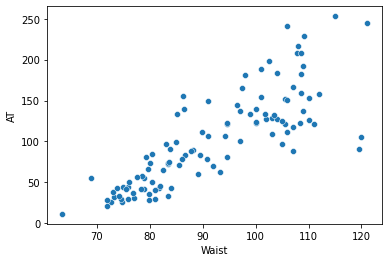

In [8]:
sns.scatterplot(x=df['Waist'],y=df['AT'])
plt.show()

# Correlation

In [9]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


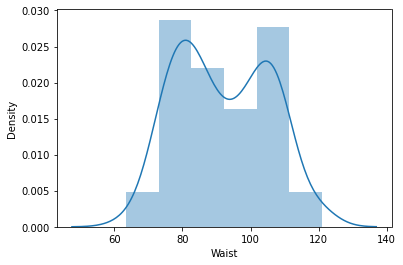

In [12]:
sns.distplot(df['Waist'])
plt.show()

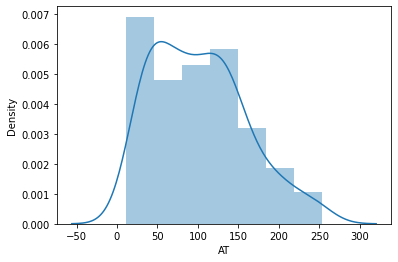

In [13]:
import seaborn as sns
sns.distplot(df['AT'])
plt.show()

# Fitting a Linear Regression Model

In [16]:
import statsmodels.formula.api as smf

model = smf.ols("AT~Waist",data = df).fit()
#trained_model = model.fit()

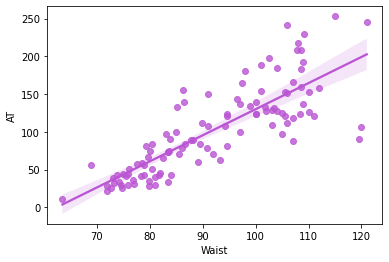

In [14]:
sns.regplot(x="Waist", y="AT", data=df, color='mediumorchid');

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.62e-27
Time:                        18:55:38   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [20]:
#t and p-Values
print(model.tvalues)    

Intercept    -9.909103
Waist        14.740376
dtype: float64


In [19]:
print( model.pvalues)    

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [21]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

# Predict for new data point

In [22]:
#Predict for 97 and 103 waist circumference
newdata=pd.Series([97,103])

In [23]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])
data_pred

,Waist
0,97
1,103


In [24]:
model.predict(data_pred)

0    119.527873
1    140.281029
dtype: float64

In [ ]:
import numpy as np

In [ ]:
value = pd.array([100,150,24,65],dtype=np.int64)
pred_data1 = pd.DataFrame(value, columns=['Waist'])
pred_data1

In [ ]:
value

In [ ]:
model.predict(pred_data1)

In [ ]:
model.mse_resid

In [ ]:
np.sqrt(model.mse_resid)